# EE5907 CA1 Part 2

1. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$
2. Add Gaussian random noise to the data

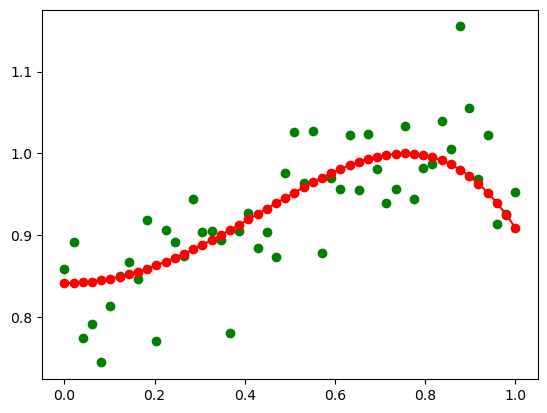

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# data generating
sig = 0.05

x = np.linspace(0, 1, 50)
X = x.reshape(-1, 1)
N = x.shape[0] # No. input samples
# print (X.shape)
y = np.sin(x**2 + 1)
Y = y.reshape(y.shape[0],1)
yn = y + np.random.normal(0, sig, size=50) 
Yn = yn.reshape(yn.shape[0],1)

plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.show()


3. Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class

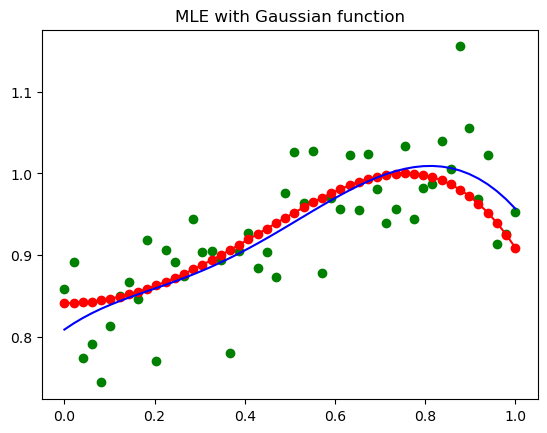

In [19]:
def gaussian(x, mean, sigma):

    gau = np.exp(-((x - mean)**2)/(2*(sigma**2)))

    return gau
# gd = gaussian(X,1,1)
# print(gd)

def sigmoid(x, mu, sigma):

    h = 1/(1 + np.exp(-(x-mu)/sigma))
    return h

def getmean(x, m):

    mu = np.zeros((m))
    gap = (max(x) - min(x))/m

    for i in range(m):
        mu[i] = i * gap

    return mu
# mu = getmean(X,M)
# print(mu, mu.shape)

M = 6 # model complexity
s = 0.5

# MLE
def basismle(x, data, m, mode, s, n = N):

    phi_mat = np.zeros((n, m))
    # print(phimat.shape, X.shape)
    mu = getmean(x, m)

    for row in range(n):
        for col in range(m):
            if col == 0:
                phi_mat[row, col] = 1
            else:
                if mode == 0:
                    phi_mat[row, col] = gaussian(x[row], mu[col], s)
                else:
                    phi_mat[row, col] = sigmoid(x[row], mu[col], s)
    # print(phimat)

    weight = np.dot(np.dot(np.linalg.inv(np.dot((phi_mat.T), phi_mat)), (phi_mat.T)), data)

    pred = np.dot(phi_mat, weight)
    return weight, pred

# Gaussian basis function
weight, y_pred = basismle(X, Yn, M, 0, 0.5)

plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.title('MLE with Gaussian function')
plt.show()


4. Show your results for different values of M that generate overfitting and underfitting curves

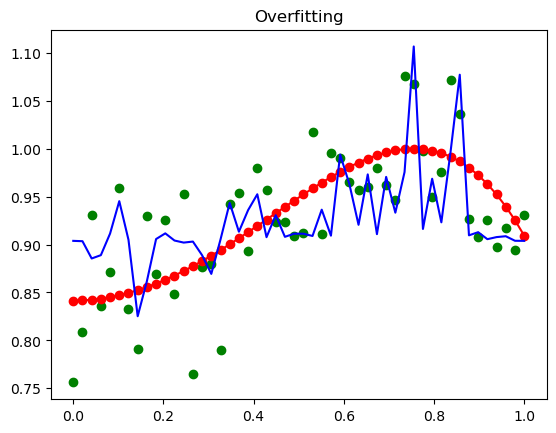

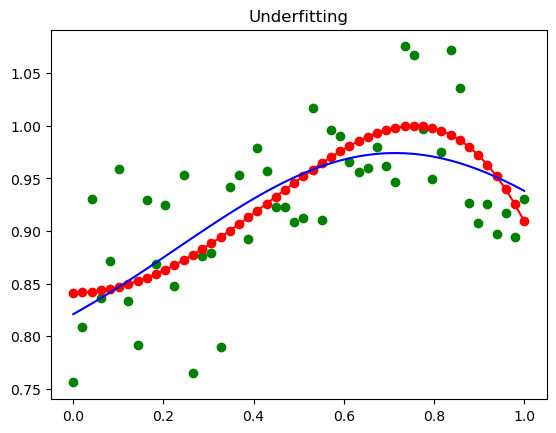

In [13]:
# overfitting
weight, y_pred = basismle(X, Yn, 20, 0, 0.01)

plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.title('Overfitting')
plt.show()

# underfitting
weight, y_pred = basismle(X, Yn, 3, 0, 0.5)

plt.scatter(x, yn, c='green')
plt.title('Underfitting')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.show()


5. Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves

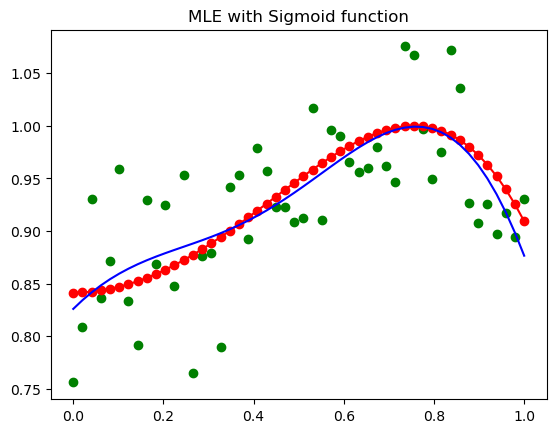

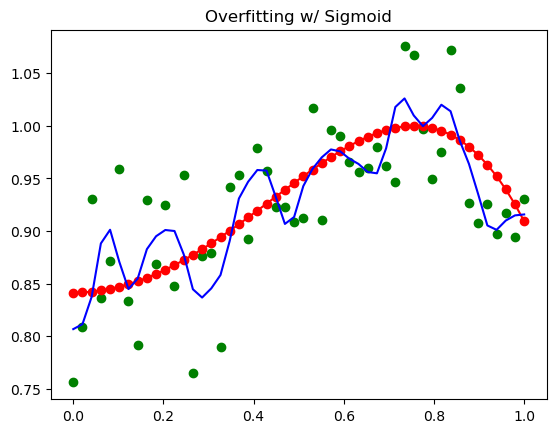

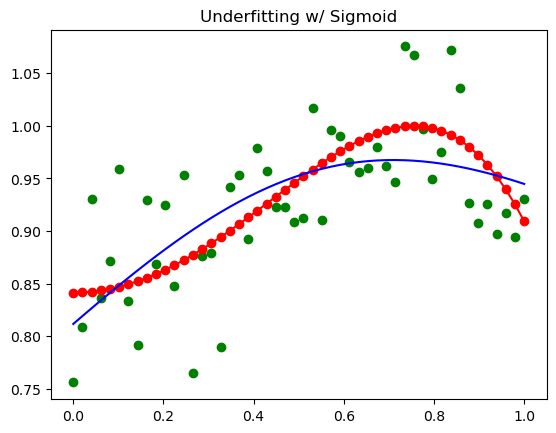

In [14]:
# Sigmoid basis function
weight, y_pred1 = basismle(X, Yn, M, 1, 0.5)

plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred1, color='b')
plt.title('MLE with Sigmoid function')
plt.show()

# overfitting
weight, y_pred = basismle(X, Yn, 20, 1, 0.01)

plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.title('Overfitting w/ Sigmoid')
plt.show()

# underfitting
weight, y_pred = basismle(X, Yn, 3, 1, 0.5)

plt.scatter(x, yn, c='green')
plt.title('Underfitting w/ Sigmoid')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.show()


6. Change the original curve function to $y = 0.4345 x^3 - 5.607 x^2 + 16.78 x - 10.61$, and use the sigmoid basis function to estimate the best curve fitting from the noisy data

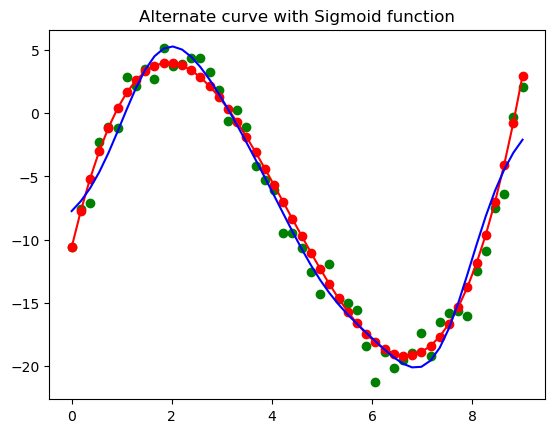

In [22]:
# Alternate curve function
sig1 = 1
M1 = 8
x1 = np.linspace(0, 9, 50)
X1 = x1.reshape(-1, 1)
y_test = 0.4345 * (x1**3) - 5.607 * (x1**2) + 16.78 * x1 - 10.61
Y1 = y_test.reshape(y_test.shape[0],1)
yn1 = y_test + np.random.normal(0, sig1, size=50) 
Yn1 = yn1.reshape(yn1.shape[0],1)
N1 = X1.shape[0]

weight, y_pred2 = basismle(X1, Yn1, M1, 1, 0.5, N1)

plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_pred2, color='b')
plt.title('Alternate curve with Sigmoid function')
plt.show()

7. Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions

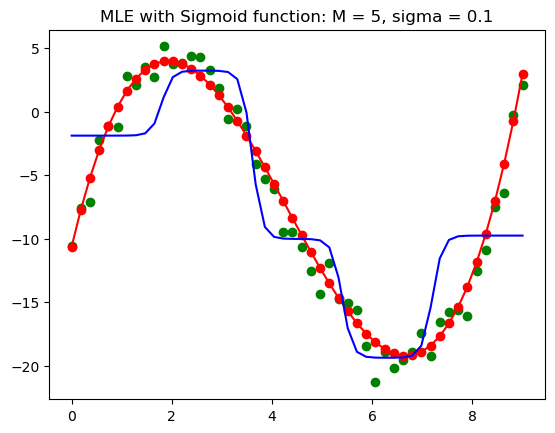

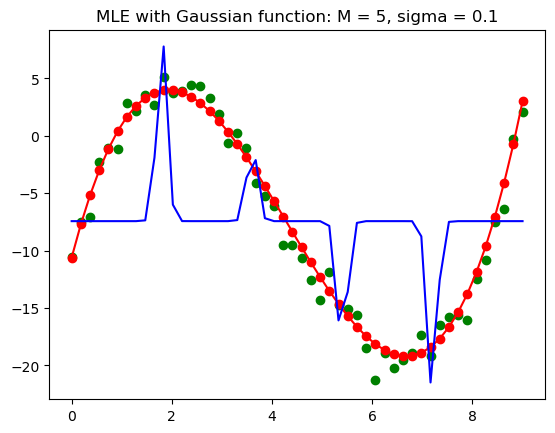

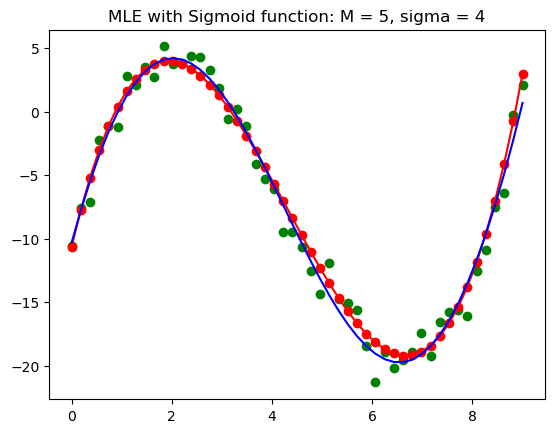

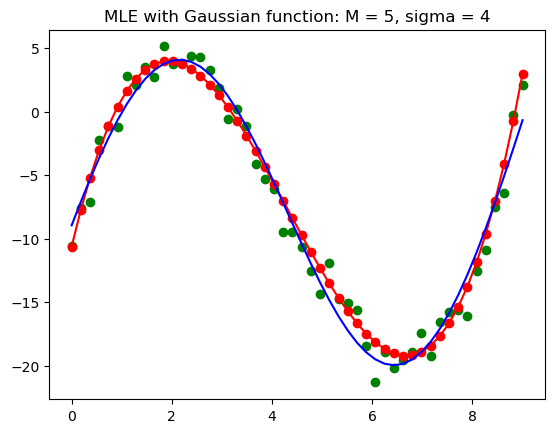

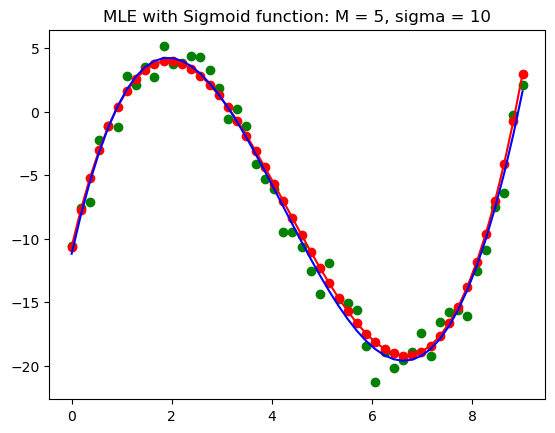

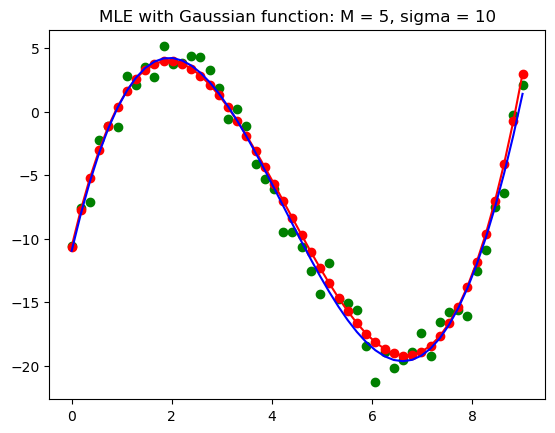

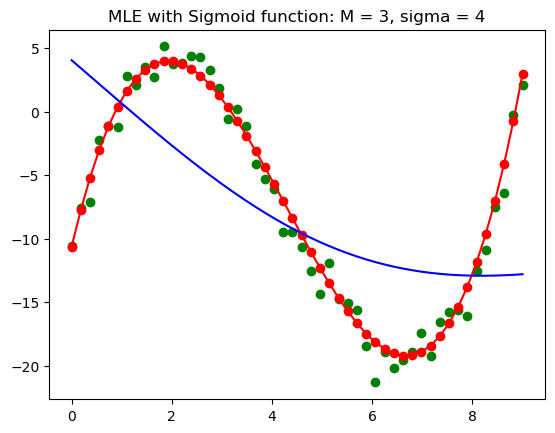

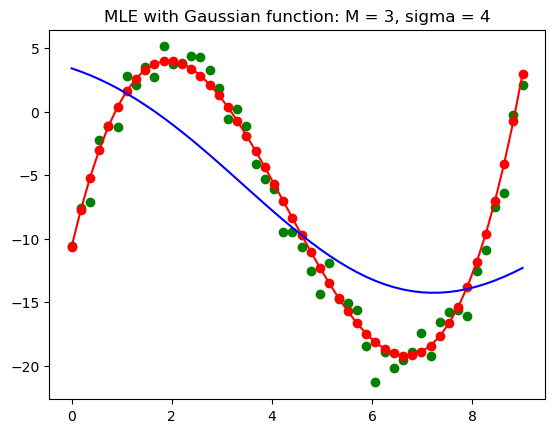

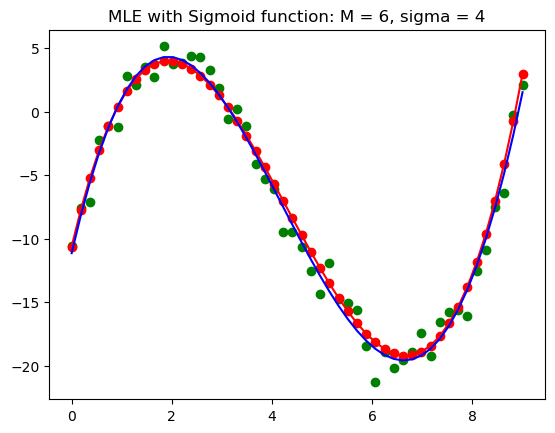

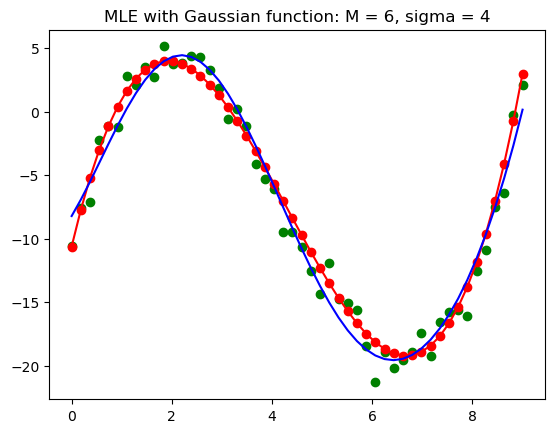

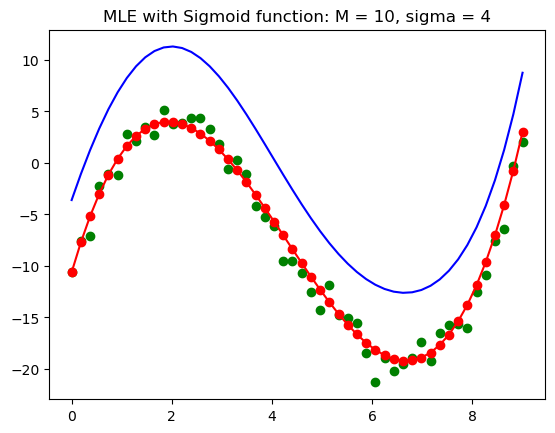

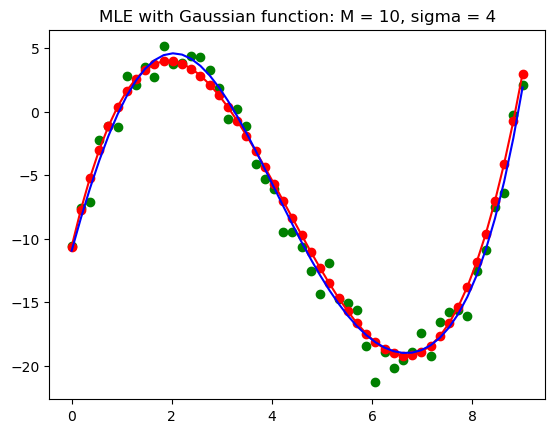

In [32]:

# M = 5， s = 1
M = 5 
s = 0.1
weight, y_sig = basismle(X1, Yn1, M, 1, s)
weight, y_gau = basismle(X1, Yn1, M, 0, s)
plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_sig, color='b')
plt.title('MLE with Sigmoid function: M = {}, sigma = {}'.format(M, s))
plt.show()
plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_gau, color='b')
plt.title('MLE with Gaussian function: M = {}, sigma = {}'.format(M, s))
plt.show()

# M = 5, s = 4
M = 5 
s = 4
weight, y_sig = basismle(X1, Yn1, M, 1, s)
weight, y_gau = basismle(X1, Yn1, M, 0, s)

plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_sig, color='b')
plt.title('MLE with Sigmoid function: M = {}, sigma = {}'.format(M, s))
plt.show()
plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_gau, color='b')
plt.title('MLE with Gaussian function: M = {}, sigma = {}'.format(M, s))
plt.show()

# M = 5, s = 10
M = 5 
s = 10
weight, y_sig = basismle(X1, Yn1, M, 1, s)
weight, y_gau = basismle(X1, Yn1, M, 0, s)

plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_sig, color='b')
plt.title('MLE with Sigmoid function: M = {}, sigma = {}'.format(M, s))
plt.show()
plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_gau, color='b')
plt.title('MLE with Gaussian function: M = {}, sigma = {}'.format(M, s))
plt.show()

# M = 3, s = 4
M = 3
s = 4
weight, y_sig = basismle(X1, Yn1, M, 1, s)
weight, y_gau = basismle(X1, Yn1, M, 0, s)

plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_sig, color='b')
plt.title('MLE with Sigmoid function: M = {}, sigma = {}'.format(M, s))
plt.show()
plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_gau, color='b')
plt.title('MLE with Gaussian function: M = {}, sigma = {}'.format(M, s))
plt.show()

# M = 6, s = 4
M = 6
s = 4
weight, y_sig = basismle(X1, Yn1, M, 1, s)
weight, y_gau = basismle(X1, Yn1, M, 0, s)

plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_sig, color='b')
plt.title('MLE with Sigmoid function: M = {}, sigma = {}'.format(M, s))
plt.show()
plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_gau, color='b')
plt.title('MLE with Gaussian function: M = {}, sigma = {}'.format(M, s))
plt.show()

# M = 10, s = 4
M = 10
s = 4
weight, y_sig = basismle(X1, Yn1, M, 1, s)
weight, y_gau = basismle(X1, Yn1, M, 0, s)

plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_sig, color='b')
plt.title('MLE with Sigmoid function: M = {}, sigma = {}'.format(M, s))
plt.show()
plt.scatter(x1, yn1, c='green')
plt.scatter(x1, y_test, c='red')
plt.plot(x1, y_test, color='r')
plt.plot(x1, y_gau, color='b')
plt.title('MLE with Gaussian function: M = {}, sigma = {}'.format(M, s))
plt.show()


The Gaussian function is a local function while the polynomial function is a global function, which means that the latter one is quite sensitive to random noise and it is more computational expensive. The Gaussian function is more suitable for complex and irregular data.